# Basic Statistics in Python



In [1]:
#the usual suspects
import numpy as np
import pandas as pd

#modules for statistics
import math 
import statistics
from scipy import stats

# Mean, Median, Mode, and Central Tendency

mean = sum of all numbers / total number of values 

     = average, balance point
     
     = arithmetic mean
     
median = middle number when the values are put in order, outliers have a smallish impact on median

mode = number that occurs most often

In [3]:
belize_listings_path = "belize_airbnb_listings.csv"
belize_df = pd.read_csv(belize_listings_path)
belize_df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36666,Mo's Cozy Casa w/ veranda & access to dock,157752,Monique,Belize,Belize Islands,17.74786,-88.02398,Entire home/apt,141,3,250,2/23/2021,2.00,5,225
1,36690,Mo's Cozy Cabana w/ comfy veranda & access to ...,157752,Monique,Belize,Belize Islands,17.74832,-88.02474,Entire home/apt,71,3,316,2/19/2021,2.46,5,164


In [5]:
belize_df[["price", "minimum_nights","number_of_reviews","reviews_per_month"]].mean()

price                357.102289
minimum_nights         2.263948
number_of_reviews     14.453505
reviews_per_month      0.538088
dtype: float64

In [6]:
belize_df[["price", "minimum_nights","number_of_reviews","reviews_per_month"]].median()

price                220.000
minimum_nights         2.000
number_of_reviews      2.000
reviews_per_month      0.275
dtype: float64

In [7]:
belize_df[["price", "minimum_nights","number_of_reviews","reviews_per_month"]].mode()

,price,minimum_nights,number_of_reviews,reviews_per_month
0,151,1.0,0.0,0.08
1,252,NaN,NaN,NaN


Text(0, 0.5, 'Frequency')

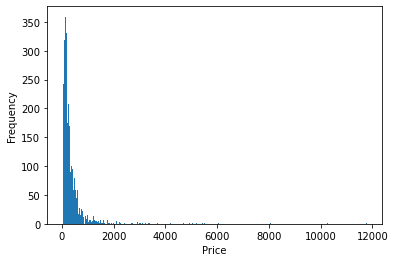

In [11]:
import matplotlib.pyplot as plt
#why do we bin our data when were trying to understand central tendency?
#we dont need a y value in a histogram because its a measure of frequency
n, bins, patches = plt.hist(x=belize_df['price'], bins='auto')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Variance

Variance measures how dispersed data points are from the mean. Low variance means the data points are pretty similar. High variance means the data points are pretty spread out from the mean.

Its basically like saying the data points are, on average, x square dollars away from the mean. 

Variance of 0 means that all the values are the same. 

In [12]:
#function for variance
def variance(data,ddof=0):
    n = len(data)
    mean = sum(data)/n
    return sum((x-mean)**2 for x in data)/(n-ddof)

In [13]:
#population variance
variance(belize_df['price'])

316996.1526270922

In [15]:
statistics.pvariance(belize_df['price'])

316996.15262709244

In [16]:
#sample variance
variance(belize_df['price'],ddof=1)

317109.56806631474

In [17]:
statistics.variance(belize_df['price'])

317109.568066315

# Standard Deviation

standard deviation is the square root of the variance. 

Tells you how far, on average, each value lies from the mean.

In [18]:
#population standard deviation
statistics.pstdev(belize_df['price'])

563.0241137172478

In [19]:
#sample standard deviation
statistics.stdev(belize_df['price'])

563.1248245871558

# Covariance and Correlation 

covariance is to correlation as variance is to standard devation.

Covariance tells us how much and to what extent two random variables change together. Answers the question: how much will one variable change as another variables changes.

positive = move in same direction
negative = move in opposite directions

correlation tells us how strong the relationship is between variables

correlation = (covariance of x and y)/((standard deviation of x)(standard deviation of y))

In [21]:
def covariance(x, y):
    #means
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))
    
    #subtract mean from each value in each row
    sub_x = [i - mean_x for i in x]
    sub_y = [i - mean_y for i in y]
    
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    denominator = len(x)-1
    cov = numerator/denominator
    return cov

In [22]:
cov_reviews_availability = covariance(belize_df['number_of_reviews'],belize_df['availability_365'])
cov_reviews_availability

-59.87012215252558

In [24]:
cov_reviews_availability/(statistics.stdev(belize_df['number_of_reviews'])*statistics.stdev(belize_df['availability_365']))

-0.01636661618148322

In [25]:
np.cov(belize_df['number_of_reviews'],belize_df['availability_365'])

array([[  919.77350828,   -59.87012215],
       [  -59.87012215, 14548.61315654]])

In [26]:
np.corrcoef(belize_df['number_of_reviews'],belize_df['availability_365'])

array([[ 1.        , -0.01636662],
       [-0.01636662,  1.        ]])

# Aggregate Functions

In [27]:
belize_df.agg(["mean","std"])

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
mean,2.792490e+07,1.240278e+08,17.448295,-88.292035,357.102289,2.263948,14.453505,0.538088,22.848355,280.315451
std,1.288964e+07,1.018001e+08,0.537440,0.383876,563.124825,5.669843,30.327768,0.662154,51.711183,120.617632
